In [143]:
import requests
import pandas as pd

url = "https://covid-19-statistics.p.rapidapi.com/regions"

headers = {
	"X-RapidAPI-Key": "75e6f2eaf6msh1c8c0c7d9dc6d9cp15eb67jsnf082524e4c2a",
	"X-RapidAPI-Host": "covid-19-statistics.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

data = response.json()
pd.DataFrame(data['data'])

,iso,name
0,CHN,China
1,TWN,Taipei and environs
2,USA,US
3,JPN,Japan
4,THA,Thailand
...,...,...
214,KIR,Kiribati
215,PLW,Palau
216,TON,Tonga
217,NRU,Nauru


In [133]:
import requests
import pandas as pd

url = "https://covid-19-statistics.p.rapidapi.com/provinces"

querystring = {"iso":"USA"}

headers = {
	"X-RapidAPI-Key": "75e6f2eaf6msh1c8c0c7d9dc6d9cp15eb67jsnf082524e4c2a",
	"X-RapidAPI-Host": "covid-19-statistics.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

data = response.json()
pd.DataFrame(data['data'])

,iso,name,province,lat,long
0,USA,US,"Norfolk County, MA",42.1767,-71.1449
1,USA,US,Alabama,32.3182,-86.9023
2,USA,US,"Alameda County, CA",37.6017,-121.7195
3,USA,US,Alaska,61.3707,-152.4044
4,USA,US,American Samoa,-14.270999999999999,-170.132
...,...,...,...,...,...
197,USA,US,"Williamson County, TN",35.9179,-86.8622
198,USA,US,Wisconsin,44.2685,-89.6165
199,USA,US,Wuhan Evacuee,0.0,0.0
200,USA,US,Wyoming,42.7560,-107.3025


In [141]:
import requests

url = "https://covid-19-statistics.p.rapidapi.com/reports"

querystring = {"city_name":"Autauga","region_province":"Alabama","iso":"USA","region_name":"US","q":"US Alabama","date":"2020-04-16"}

headers = {
	"X-RapidAPI-Key": "75e6f2eaf6msh1c8c0c7d9dc6d9cp15eb67jsnf082524e4c2a",
	"X-RapidAPI-Host": "covid-19-statistics.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

data = response.json()
df3 = pd.DataFrame(data['data'][0]['region']['cities'])

In [142]:
df3

,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,last_update
0,Autauga,2020-04-16,1001,32.53952745,-86.64408227,26,1,2,0,2020-04-16 23:30:51


In [52]:
import requests

url = "https://covid-19-statistics.p.rapidapi.com/reports/total"

querystring = {"date":"2020-04-07"}

headers = {
	"X-RapidAPI-Key": "75e6f2eaf6msh1c8c0c7d9dc6d9cp15eb67jsnf082524e4c2a",
	"X-RapidAPI-Host": "covid-19-statistics.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

data = response.json()
df = pd.DataFrame(data['data'], index=[0])
df

,date,last_update,confirmed,confirmed_diff,deaths,deaths_diff,recovered,recovered_diff,active,active_diff,fatality_rate
0,2020-04-07,2020-04-07 23:11:31,1426096,80995,81865,7300,300054,23539,1044177,50156,0.0574


In [95]:
import json
import requests
from datetime import datetime, timedelta
import pandas as pd


df_all = pd.DataFrame()

start_date = datetime(2020, 2, 1)
end_date = datetime(2020, 12, 31)
for i in range(0, 365):
    current_date = start_date + timedelta(days=i)
    date_string = current_date.strftime("%Y-%m-%d")
    querystring = {"city_name":"Autauga","region_province":"Alabama","iso":"USA","region_name":"US","q":"US Alabama","date":date_string}
    response = requests.request("GET", url, headers=headers, params=querystring)
    data = response.json()
    df = pd.DataFrame(data['data'], index=[0])
    df_all = pd.concat([df_all, df])

In [134]:
df_all2 = df_all[df_all.date.notnull()]
x = df_all2[df_all2.columns[-12:-1]]
x

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate
0,2020-03-22,157.0,0.0,0.0,26.0,0.0,0.0,2020-03-22 23:45:00,157.0,26.0,0.0000
0,2020-03-23,196.0,0.0,0.0,39.0,0.0,0.0,2020-03-23 23:19:34,196.0,39.0,0.0000
0,2020-03-24,242.0,0.0,0.0,46.0,0.0,0.0,2020-03-24 23:37:31,242.0,46.0,0.0000
0,2020-03-25,381.0,1.0,0.0,139.0,1.0,0.0,2020-03-25 23:33:19,380.0,138.0,0.0026
0,2020-03-26,517.0,1.0,0.0,136.0,0.0,0.0,2020-03-26 23:48:35,516.0,136.0,0.0019
...,...,...,...,...,...,...,...,...,...,...,...
0,2021-01-26,445909.0,6896.0,0.0,2900.0,234.0,0.0,2021-01-27 05:23:41,439013.0,2666.0,0.0155
0,2021-01-27,449086.0,7172.0,0.0,3177.0,276.0,0.0,2021-01-28 05:22:24,441914.0,2901.0,0.0160
0,2021-01-28,452734.0,7340.0,0.0,3648.0,168.0,0.0,2021-01-29 05:22:23,445394.0,3480.0,0.0162
0,2021-01-29,455582.0,7566.0,0.0,2848.0,226.0,0.0,2021-01-30 05:22:49,448016.0,2622.0,0.0166


In [135]:
x["month"] = pd.PeriodIndex(x["date"],freq = "M")
x

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,month
0,2020-03-22,157.0,0.0,0.0,26.0,0.0,0.0,2020-03-22 23:45:00,157.0,26.0,0.0000,2020-03
0,2020-03-23,196.0,0.0,0.0,39.0,0.0,0.0,2020-03-23 23:19:34,196.0,39.0,0.0000,2020-03
0,2020-03-24,242.0,0.0,0.0,46.0,0.0,0.0,2020-03-24 23:37:31,242.0,46.0,0.0000,2020-03
0,2020-03-25,381.0,1.0,0.0,139.0,1.0,0.0,2020-03-25 23:33:19,380.0,138.0,0.0026,2020-03
0,2020-03-26,517.0,1.0,0.0,136.0,0.0,0.0,2020-03-26 23:48:35,516.0,136.0,0.0019,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-01-26,445909.0,6896.0,0.0,2900.0,234.0,0.0,2021-01-27 05:23:41,439013.0,2666.0,0.0155,2021-01
0,2021-01-27,449086.0,7172.0,0.0,3177.0,276.0,0.0,2021-01-28 05:22:24,441914.0,2901.0,0.0160,2021-01
0,2021-01-28,452734.0,7340.0,0.0,3648.0,168.0,0.0,2021-01-29 05:22:23,445394.0,3480.0,0.0162,2021-01
0,2021-01-29,455582.0,7566.0,0.0,2848.0,226.0,0.0,2021-01-30 05:22:49,448016.0,2622.0,0.0166,2021-01


In [136]:
x2 = x.sort_values('date').groupby('month').last().reset_index()
x2

,month,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate
0,2020-03,2020-03-31,987.0,23.0,0.0,88.0,13.0,0.0,2020-03-31 23:43:56,964.0,75.0,0.0233
1,2020-04,2020-04-30,7088.0,272.0,0.0,176.0,16.0,0.0,2020-05-01 02:32:28,6816.0,160.0,0.0384
2,2020-05,2020-05-31,17952.0,630.0,0.0,593.0,12.0,0.0,2020-06-01 02:32:46,17322.0,581.0,0.0351
3,2020-06,2020-06-30,38045.0,950.0,0.0,870.0,21.0,0.0,2020-07-01 04:33:52,37095.0,849.0,0.0250
4,2020-07,2020-07-31,87723.0,1580.0,0.0,1961.0,15.0,0.0,2020-08-01 04:36:27,86143.0,1946.0,0.0180
5,2020-08,2020-08-31,126058.0,2182.0,0.0,823.0,20.0,0.0,2020-09-01 04:28:31,123876.0,803.0,0.0173
6,2020-09,2020-09-30,154701.0,2540.0,0.0,1147.0,23.0,0.0,2020-10-01 04:23:42,152161.0,1124.0,0.0164
7,2020-10,2020-10-31,192285.0,2967.0,0.0,1789.0,35.0,0.0,2020-11-01 04:36:19,189318.0,1754.0,0.0154
8,2020-11,2020-11-30,249524.0,3578.0,0.0,2295.0,1.0,0.0,2020-12-01 05:26:18,245946.0,2294.0,0.0143
9,2020-12,2020-12-31,361226.0,4827.0,0.0,4406.0,53.0,0.0,2021-01-01 05:23:07,356399.0,4353.0,0.0134


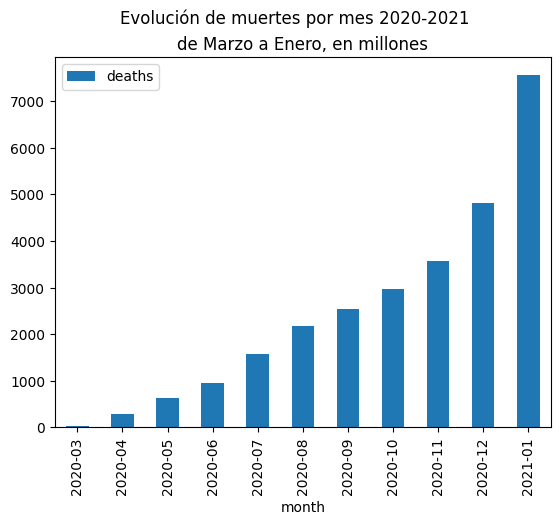

In [140]:
import matplotlib.pyplot as plt
x2.plot(kind = "bar", x = "month", y = "deaths")
plt.title("de Marzo a Enero, en millones")
plt.suptitle("Evolución de muertes por mes 2020-2021")
"Evolución de muertes por mes"
plt.show()